In [1]:
import numpy as np
import os

# Define the relative path to the data directory
data_path = os.path.join("..", "data", "image_data")  # Go up one level, then into data/image_data

# List all .npz files in the folder
npz_files = [f for f in os.listdir(data_path) if f.endswith(".npz")]
print("Found .npz files:", npz_files)

# Load a specific .npz file
file_path = os.path.join(data_path, "O013257.npz")  # Change to any file you need
data = np.load(file_path)

# Print available arrays in the .npz file
print("Arrays in file:", data.files)

# Extract the first array (assuming it's unnamed, so NumPy defaults to 'arr_0')
image_data = data["arr_0"]  # Replace 'arr_0' with the actual key if needed

print("Shape of the data:", image_data.shape)  # Check dimensions
print("First few rows:\n", image_data[:5])  # Preview first 5 rows


Found .npz files: ['O098302.npz', 'O018150.npz', 'O003471.npz', 'O120437.npz', 'O103661.npz', 'O114146.npz', 'O013257.npz', 'O083157.npz', 'O082458.npz', 'O120204.npz', 'O023509.npz', 'O040518.npz', 'O104360.npz', 'O050770.npz', 'O060556.npz', 'O007665.npz', 'O087817.npz', 'O066847.npz', 'O082924.npz', 'O055896.npz', 'O066614.npz', 'O007199.npz', 'O071973.npz', 'O056129.npz', 'O072672.npz', 'O088516.npz', 'O092477.npz', 'O113680.npz', 'O092710.npz', 'O045178.npz', 'O023975.npz', 'O034926.npz', 'O077798.npz', 'O019082.npz', 'O098768.npz', 'O012791.npz', 'O008830.npz', 'O109020.npz', 'O103428.npz', 'O044479.npz', 'O002539.npz', 'O093642.npz', 'O071041.npz', 'O008597.npz', 'O092943.npz', 'O007898.npz', 'O087351.npz', 'O098069.npz', 'O007432.npz', 'O082225.npz', 'O034693.npz', 'O049838.npz', 'O081992.npz', 'O055663.npz', 'O060789.npz', 'O029567.npz', 'O023742.npz', 'O040052.npz', 'O050537.npz', 'O002772.npz', 'O109719.npz', 'O067313.npz', 'O034460.npz', 'O119272.npz', 'O023276.npz', 'O0298

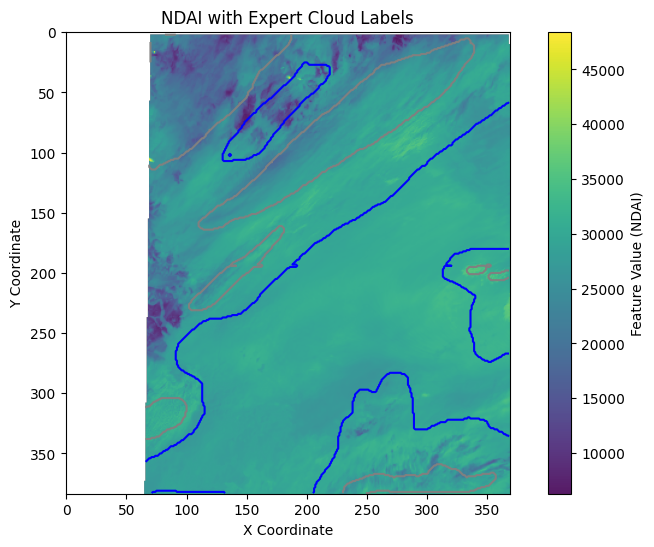

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Load a specific .npz file
data_path = os.path.join("..", "data", "image_data", "O013257.npz")  
data = np.load(data_path)
image_data = data["arr_0"]

# Extract x, y coordinates and features
y_coords = image_data[:, 0].astype(int)
x_coords = image_data[:, 1].astype(int)
feature_to_visualize = image_data[:, 5]  # NDAI (column 2)
expert_labels = image_data[:, 10]  # Expert labels (column 10)

# Determine image shape
image_height = y_coords.max() + 1
image_width = x_coords.max() + 1

# Create feature image grid
feature_grid = np.full((image_height, image_width), np.nan)
feature_grid[y_coords, x_coords] = feature_to_visualize

# Create label mask for cloud vs non-cloud
label_grid = np.full((image_height, image_width), np.nan)
label_grid[y_coords, x_coords] = expert_labels

# Plot feature map (e.g., NDAI) as background
plt.figure(figsize=(10, 6))
plt.imshow(feature_grid, cmap="viridis", alpha=0.9)  
plt.colorbar(label="Feature Value (NDAI)")

# Overlay expert labels as contour lines
plt.contour(label_grid, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], linewidths=1.5)
plt.title("NDAI with Expert Cloud Labels")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.show()


In [1]:
import numpy as np
import os

# Load the .npz file
data_path = os.path.join("..", "data", "image_data", "O013257.npz")  
data = np.load(data_path)

# List all arrays stored in the .npz file
print("Keys in .npz file:", list(data.keys()))

# Check the shape and data type of the main array
image_data = data["arr_0"]
print("Shape of image_data:", image_data.shape)
print("Data type:", image_data.dtype)

# Print the first few rows to infer column structure
print("First 5 rows:\n", image_data[:5])


Keys in .npz file: ['arr_0']
Shape of image_data: (115000, 11)
Data type: float64
First 5 rows:
 [[2.00000000e+00 7.00000000e+01 5.28075874e-01 1.82099878e+03
  9.00903702e-01 2.26925000e+04 1.98340000e+04 1.12285000e+04
  8.53650000e+03 7.00825000e+03 0.00000000e+00]
 [2.00000000e+00 7.10000000e+01 5.93831480e-01 1.16941650e+03
  4.73415554e-01 2.34610000e+04 1.83885000e+04 1.15752500e+04
  8.99325000e+03 5.97875000e+03 1.00000000e+00]
 [2.00000000e+00 7.20000000e+01 5.50953031e-01 1.37646057e+03
  8.61363053e-01 2.38317500e+04 1.67525000e+04 1.25602500e+04
  9.57075000e+03 6.90000000e+03 1.00000000e+00]
 [2.00000000e+00 7.30000000e+01 5.50160468e-01 1.38998486e+03
  6.87417388e-01 2.31857500e+04 1.55907500e+04 1.46395000e+04
  8.37250000e+03 6.72825000e+03 1.00000000e+00]
 [2.00000000e+00 7.40000000e+01 6.15812659e-01 1.38864136e+03
  4.86022204e-01 2.30477500e+04 1.60952500e+04 1.27715000e+04
  7.13600000e+03 5.48000000e+03 1.00000000e+00]]
